In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [4]:
# Read the CSV file
Data = pd.read_csv(".\Dataset-Mental-Disorders-Clean.csv")
features = list(Data.columns)
print(f"features: {features}")

Data.isnull().sum()

features: ['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']


Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
## Read the CSV file
Data = pd.read_csv("Dataset-Mental-Disorders.csv")
#print(Data.head())
features = list(Data.columns)
print(features)
frequency_dict= {'Usually': 1,'Most-Often':2,'Sometimes':3,'Seldom':4}
bool_dict={'YES':1, 'NO':0}
for f in features[1:]:
    Data[f] =  Data[f].str.strip() #remove the typo 'YES ' in 'Suicidal thoughts'
    print(str(f) + " unique values: " + str(np.unique(Data[f])) + '\n')


['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']
Sadness unique values: ['Most-Often' 'Seldom' 'Sometimes' 'Usually']

Euphoric unique values: ['Most-Often' 'Seldom' 'Sometimes' 'Usually']

Exhausted unique values: ['Most-Often' 'Seldom' 'Sometimes' 'Usually']

Sleep dissorder unique values: ['Most-Often' 'Seldom' 'Sometimes' 'Usually']

Mood Swing unique values: ['NO' 'YES']

Suicidal thoughts unique values: ['NO' 'YES']

Anorxia unique values: ['NO' 'YES']

Authority Respect unique values: ['NO' 'YES']

Try-Explanation unique values: ['NO' 'YES']

Aggressive Response unique values: ['NO' 'YES']

Ignore & Move-On unique values: ['NO' 'YES']

Nervous Break-down unique values: ['NO' 'YES']

Admit Mistakes unique v

In [5]:
Data.shape

(120, 19)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    int64 
 2   Euphoric             120 non-null    int64 
 3   Exhausted            120 non-null    int64 
 4   Sleep dissorder      120 non-null    int64 
 5   Mood Swing           120 non-null    int64 
 6   Suicidal thoughts    120 non-null    int64 
 7   Anorxia              120 non-null    int64 
 8   Authority Respect    120 non-null    int64 
 9   Try-Explanation      120 non-null    int64 
 10  Aggressive Response  120 non-null    int64 
 11  Ignore & Move-On     120 non-null    int64 
 12  Nervous Break-down   120 non-null    int64 
 13  Admit Mistakes       120 non-null    int64 
 14  Overthinking         120 non-null    int64 
 15  Sexual Activity      120 non-null    int64 
 16  Concentr

In [7]:
Data.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.266667,2.975000,2.333333,2.433333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,1.525000
std,1.082584,1.064811,1.047874,1.082584,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.107366
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,1.000000
50%,2.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000
75%,3.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,2.250000
max,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,3.000000


In [11]:
Data[Data.duplicated()].sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: object

In [28]:
patient_number = Data.iloc[:,0]
X = Data.iloc[:,1:-1]
print(f"x: {list(X.columns)}")
y = Data.iloc[:,-1]
print(f"y: {y.name}")
dict_y= {'Bipolar Type-1':0, 'Bipolar Type-2':1, 'Depression':2, 'Normal':3}
reverse_dict_y = {v: k for k, v in dict_y.items()}

x: ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim']
y: Expert Diagnose


<Axes: title={'center': 'Distribution of sexual activity over depressed population'}, xlabel='Sexual Activity', ylabel='Count'>

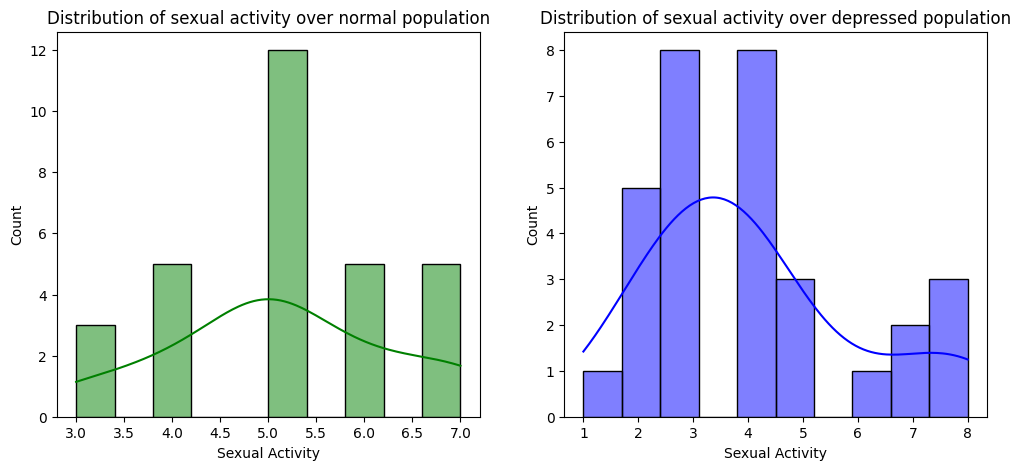

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of sexual activity over normal population")
sns.histplot(x=Data[y==dict_y['Normal']]['Sexual Activity'], kde=True, bins=10, color='green')
plt.subplot(1,2,2)
plt.title("Distribution of sexual activity over depressed population")
sns.histplot(x=Data[y==dict_y['Depression']]['Sexual Activity'], kde=True, bins=10, color='blue')

<BarContainer object of 4 artists>

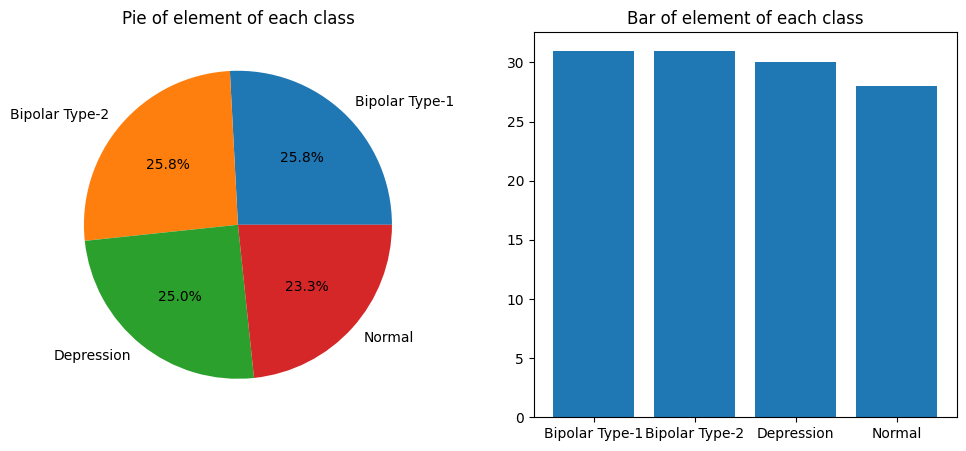

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Pie of element of each class")
plt.pie(y.value_counts(),labels=[reverse_dict_y[i] for i in np.unique(y)],autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Bar of element of each class")
plt.bar([reverse_dict_y[i] for i in np.unique(y)],y.value_counts())

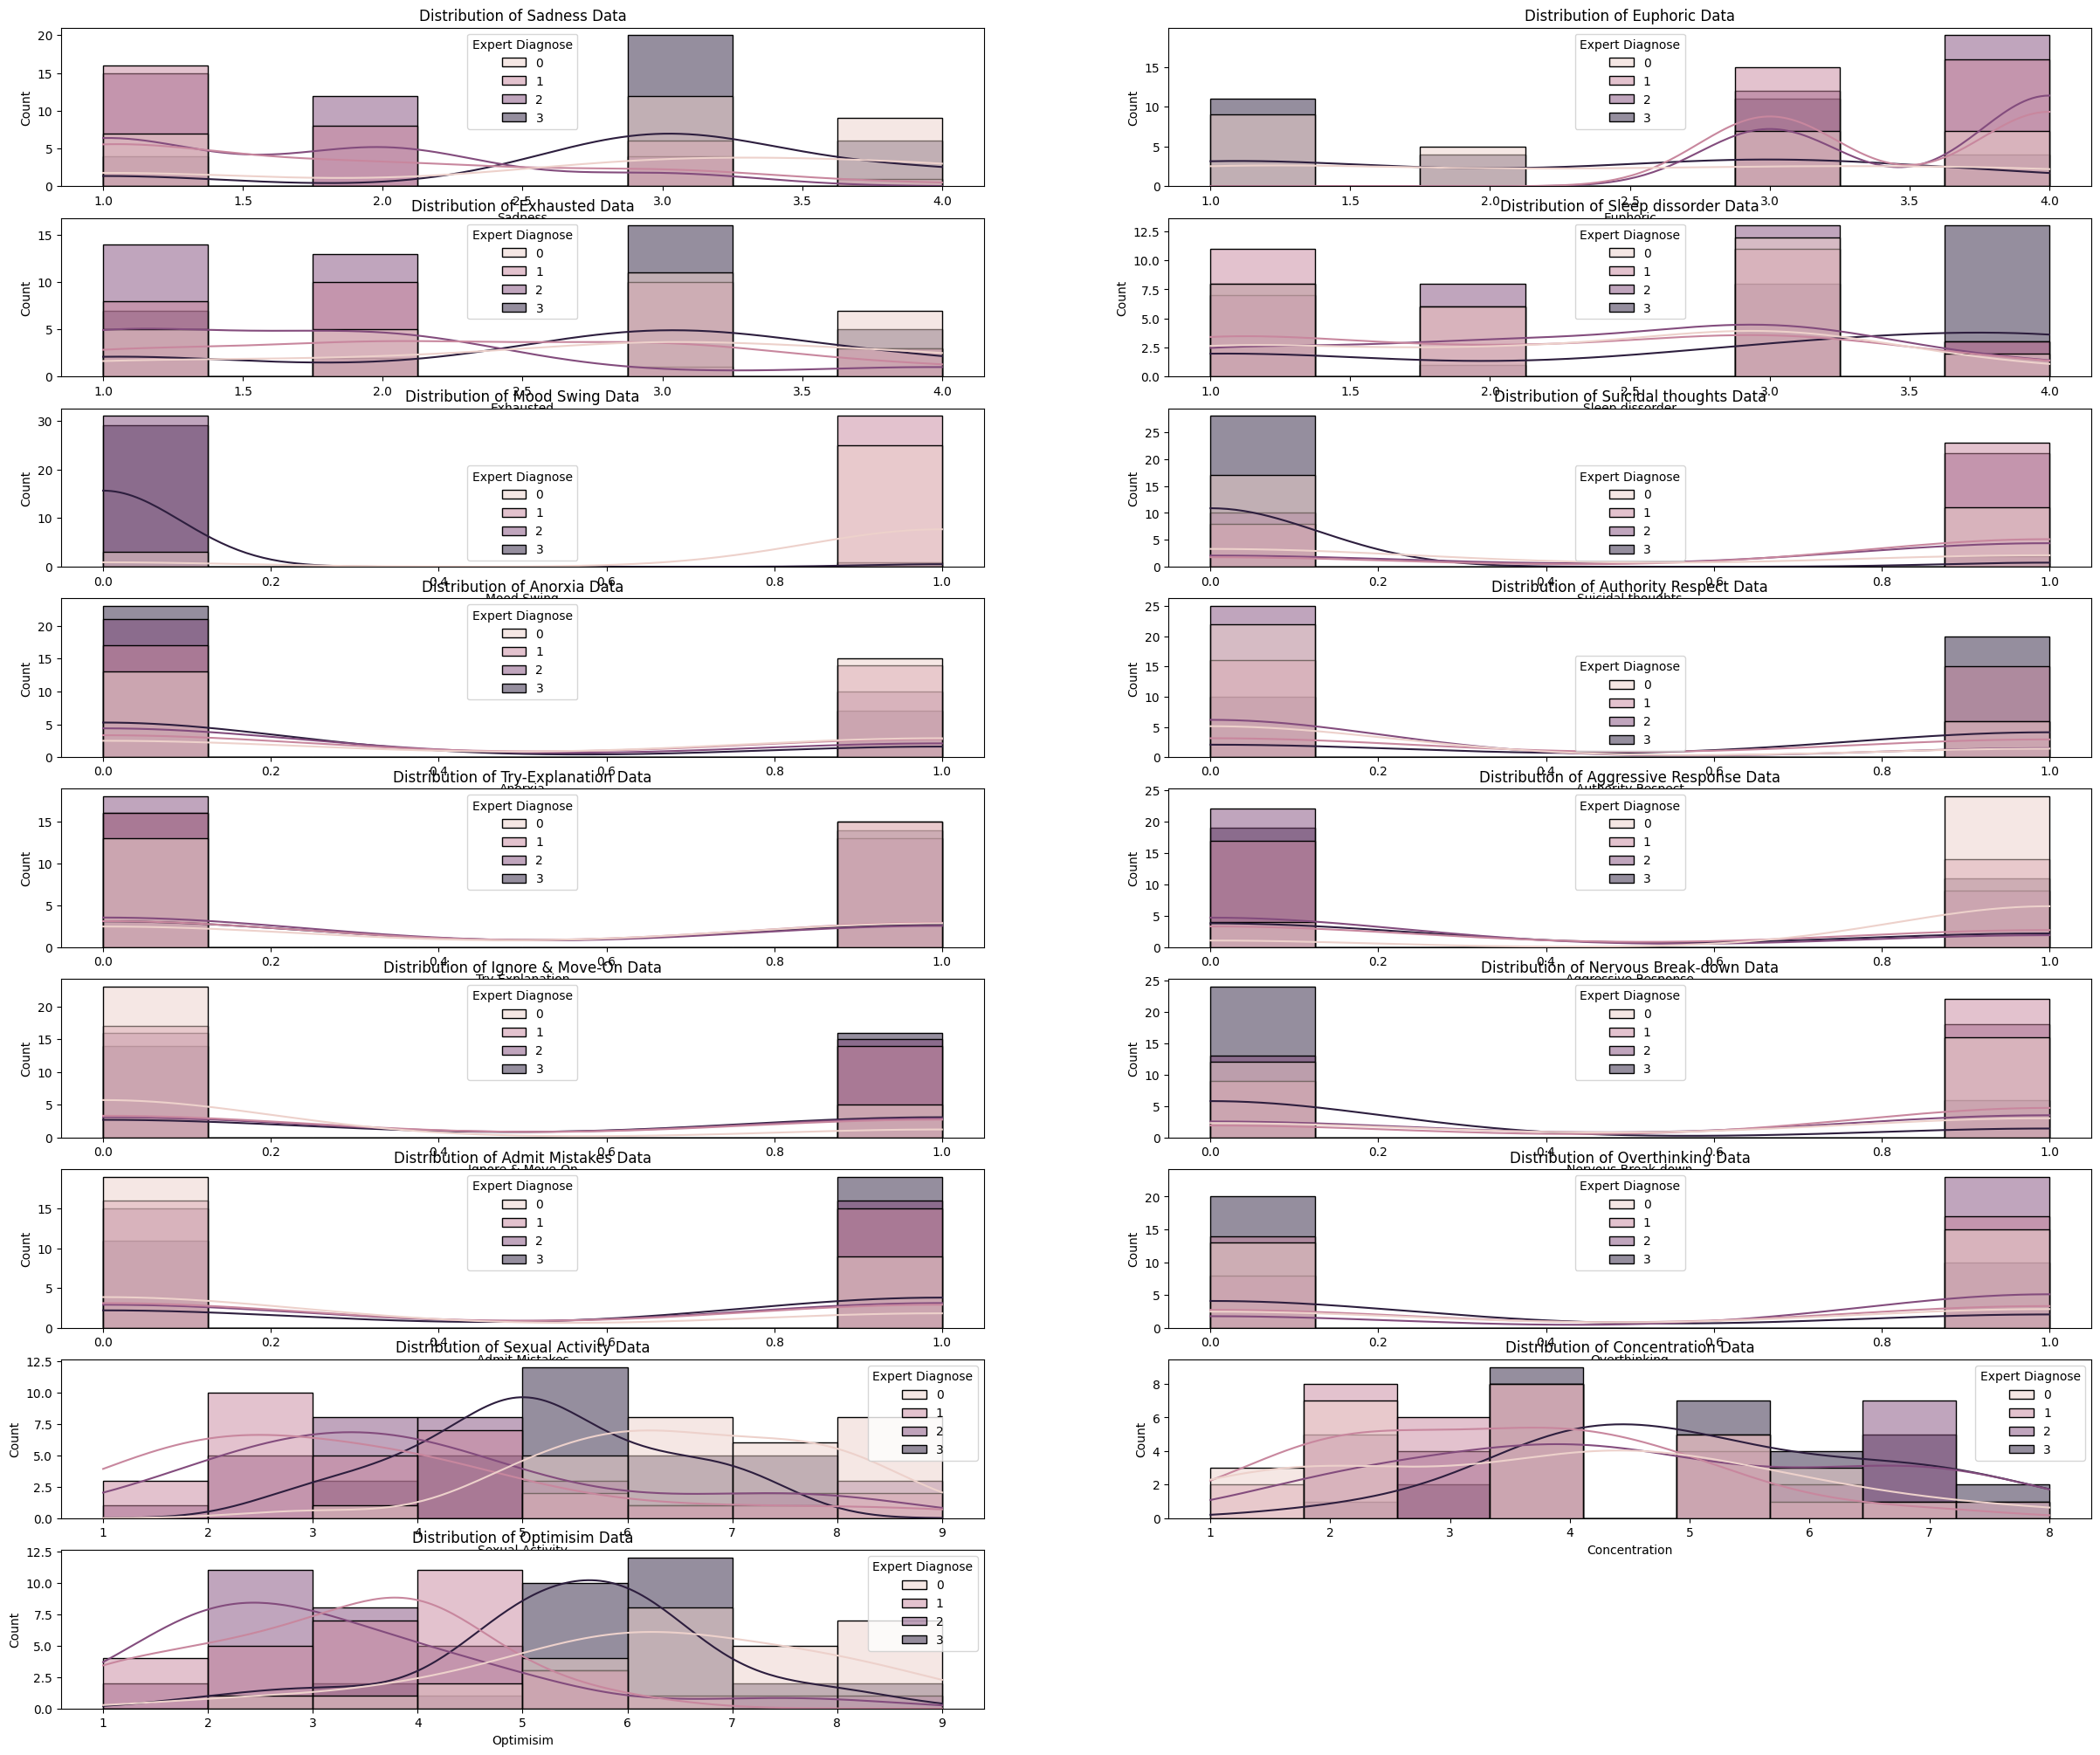

In [44]:
plt.figure(figsize=(30,25))
num_row=1
for col in X.columns:
    plt.subplot(math.ceil(len(list(X.columns))/2),2,num_row)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(x=X[col], kde=True, hue=y)
    num_row = num_row +1


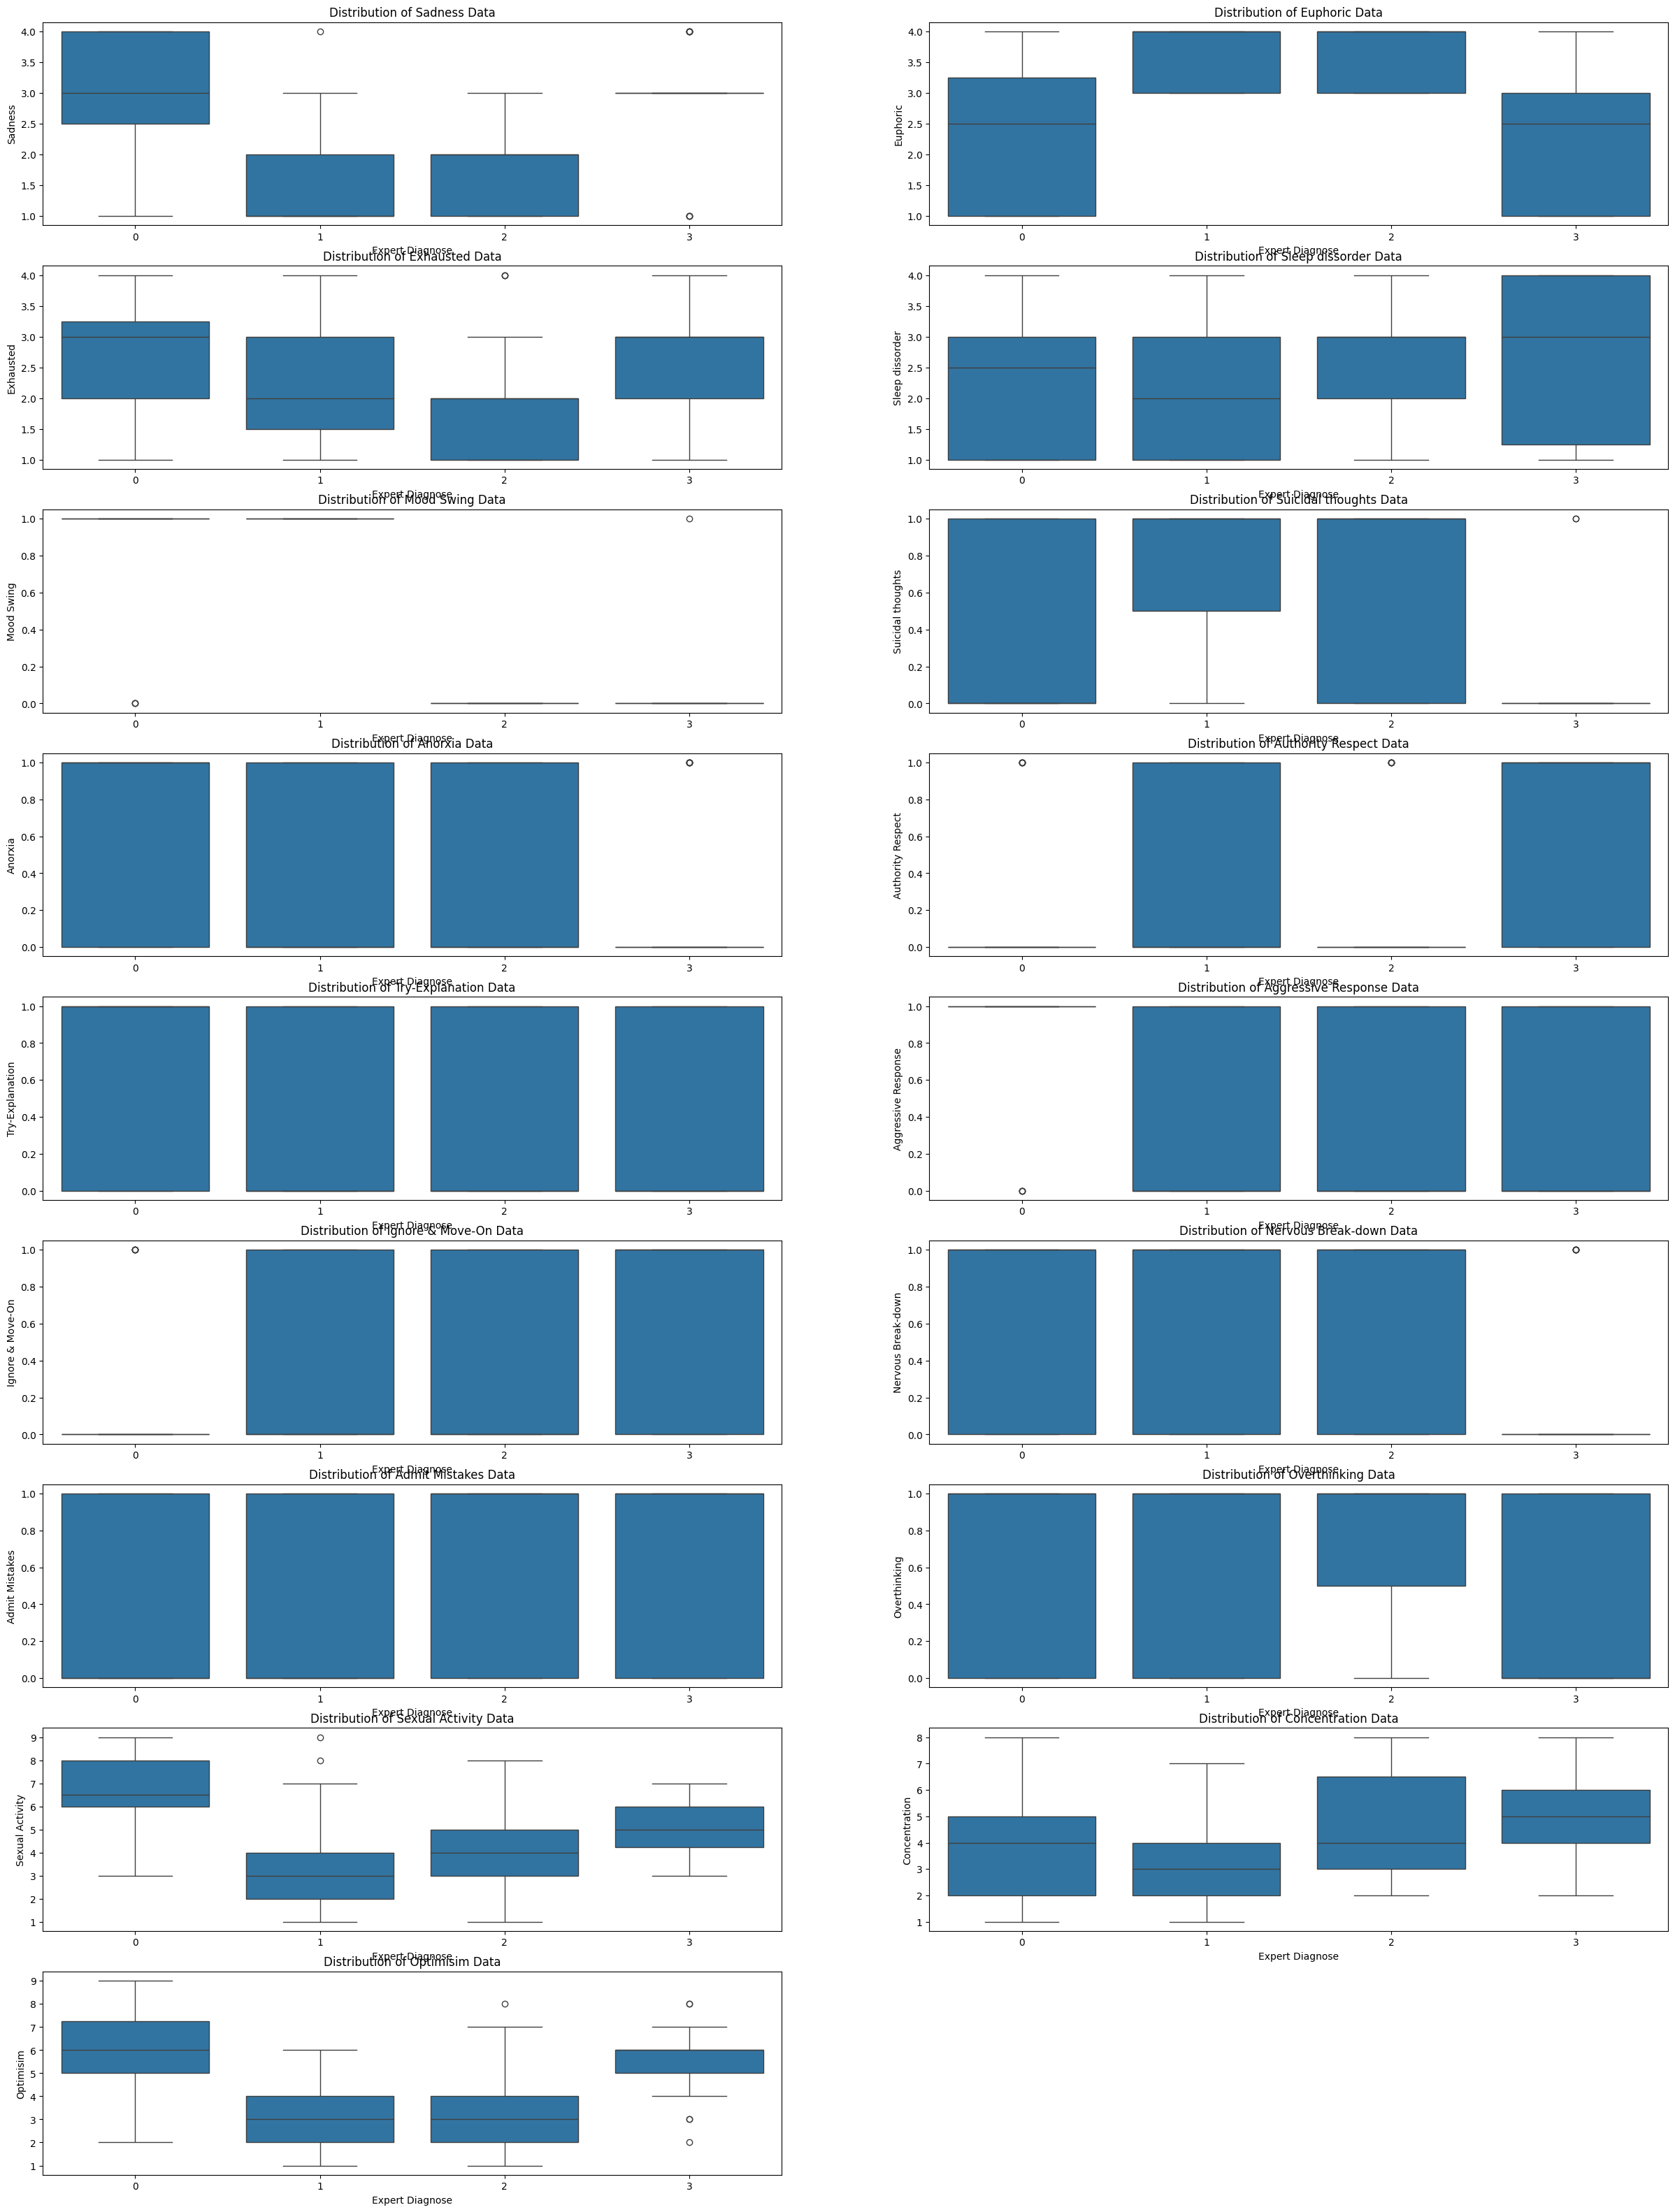

In [46]:
plt.figure(figsize=(30,40))
num_row=1
for col in X.columns:
    plt.subplot(math.ceil(len(list(X.columns))/2),2,num_row)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(y=X[col], x=y)
    num_row = num_row +1

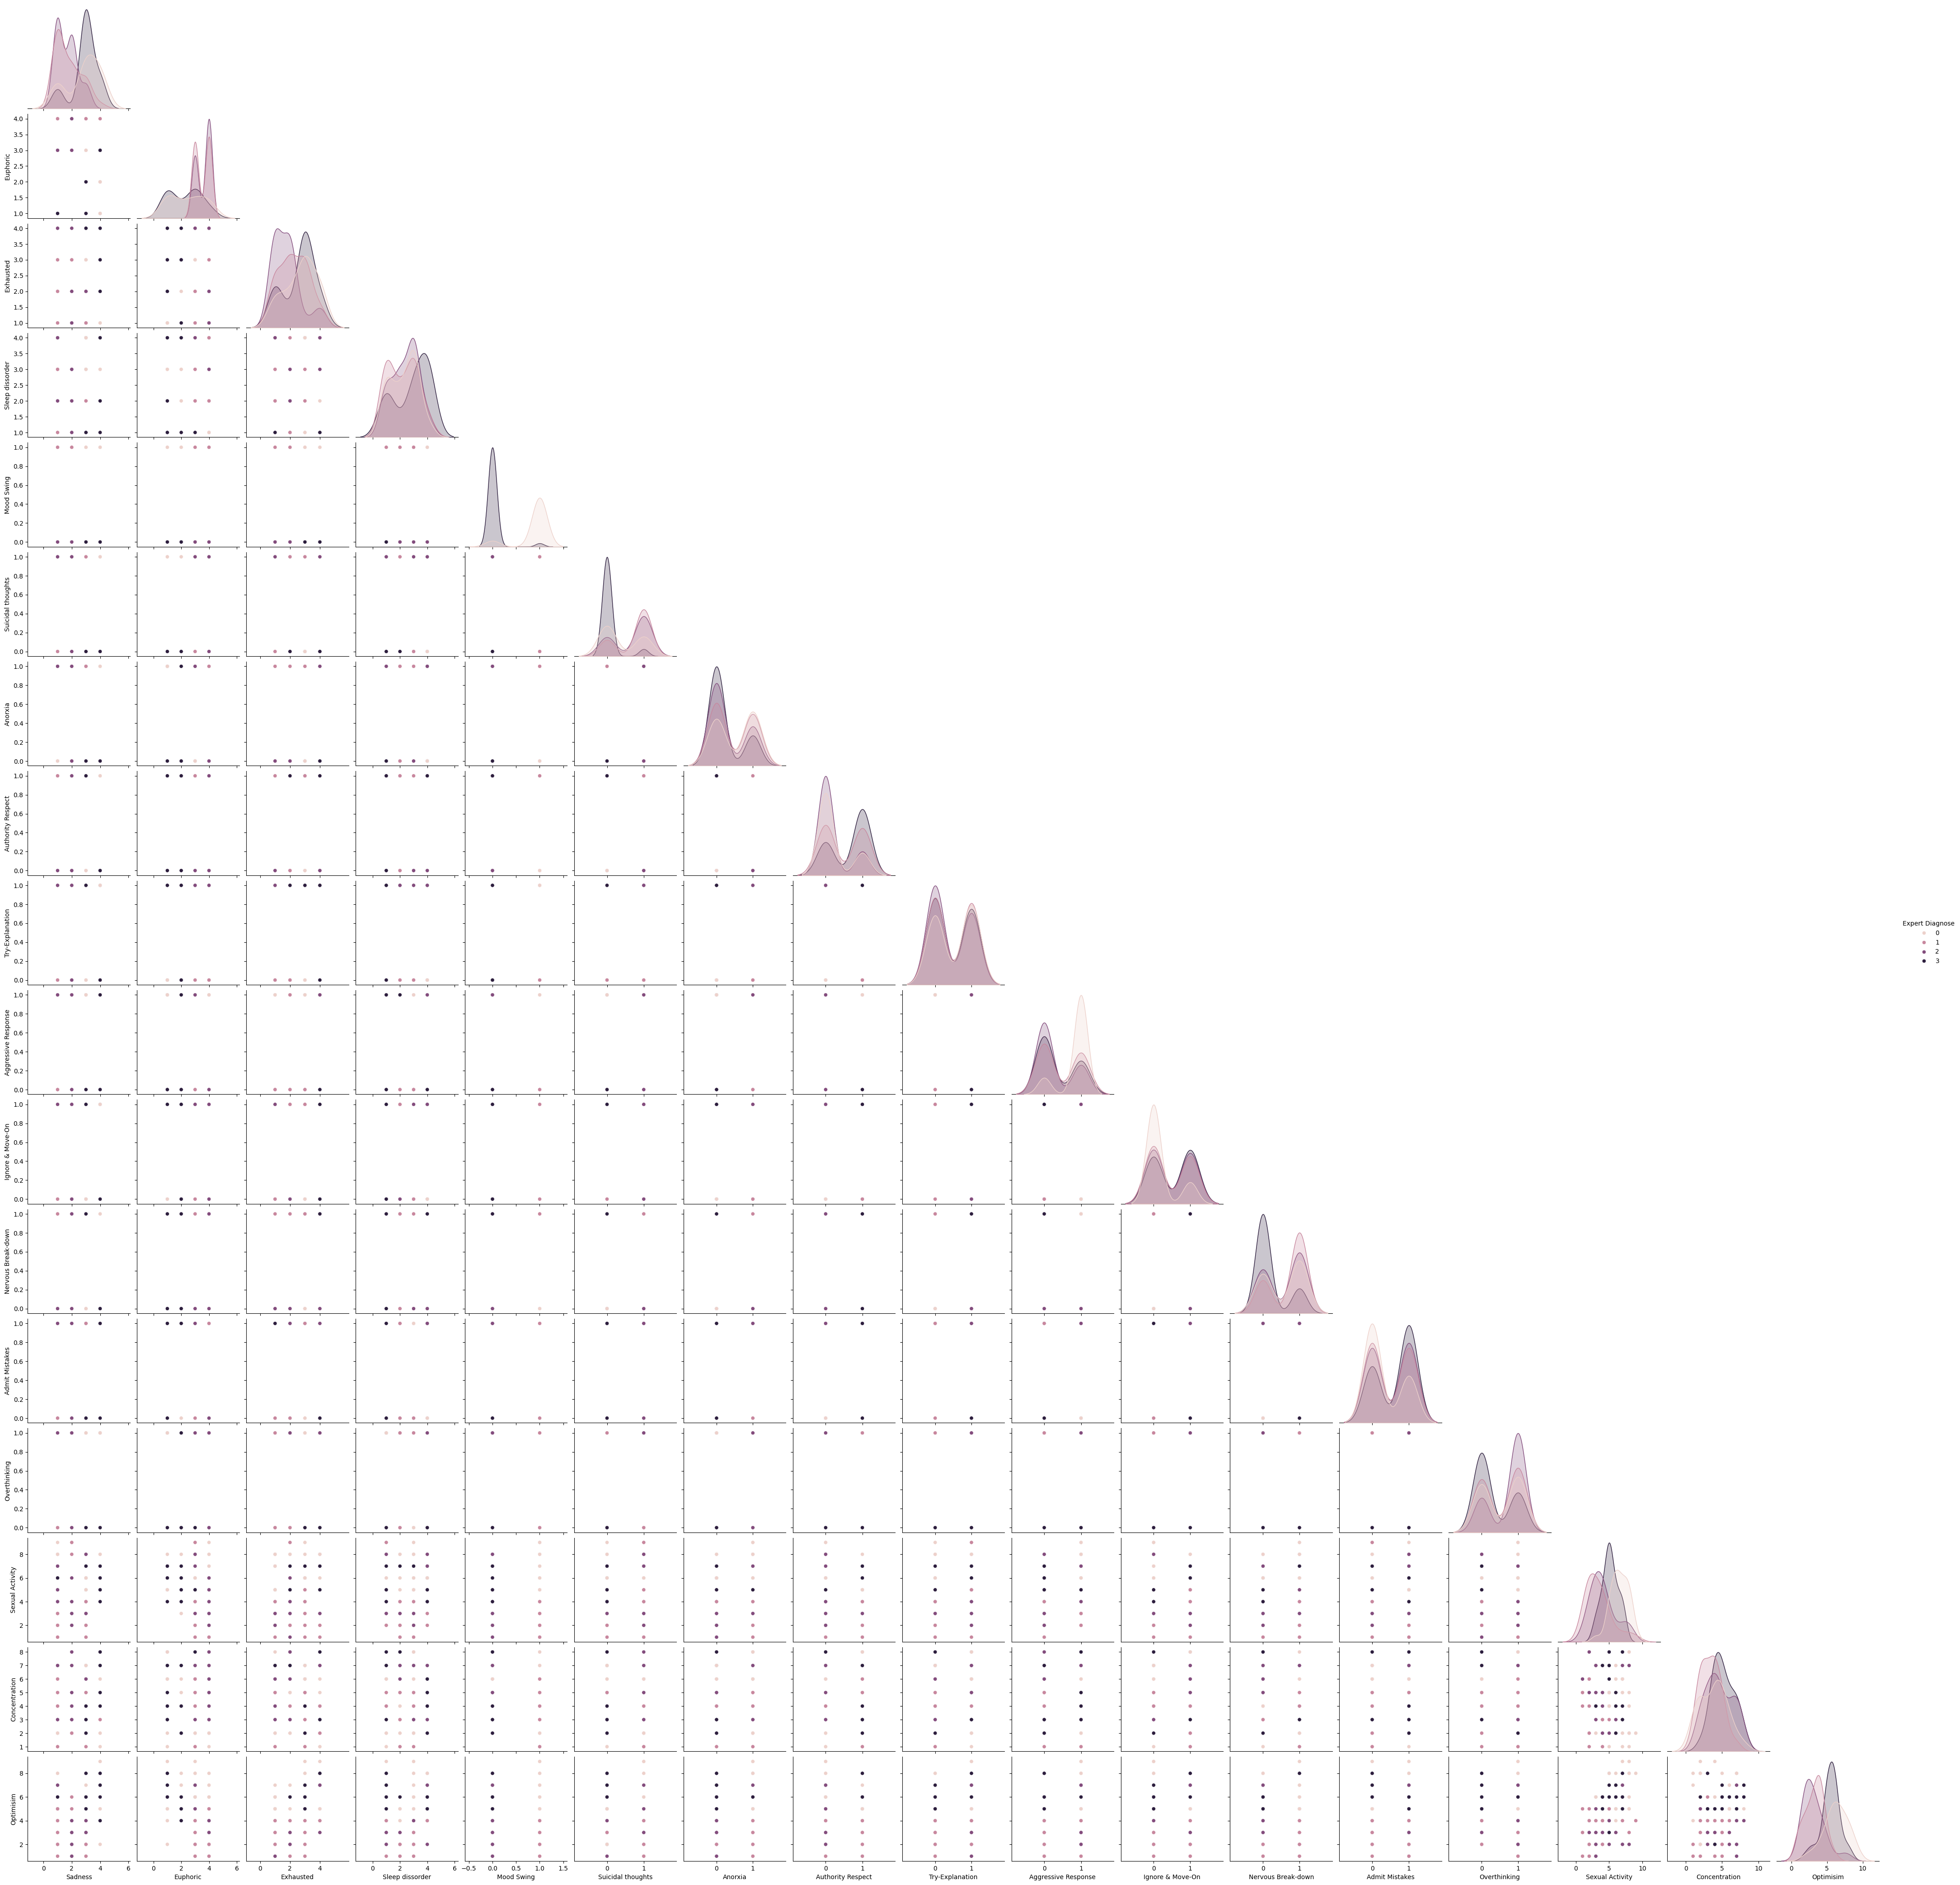

In [48]:
sns.pairplot(Data, hue='Expert Diagnose', corner=True)

<Axes: >

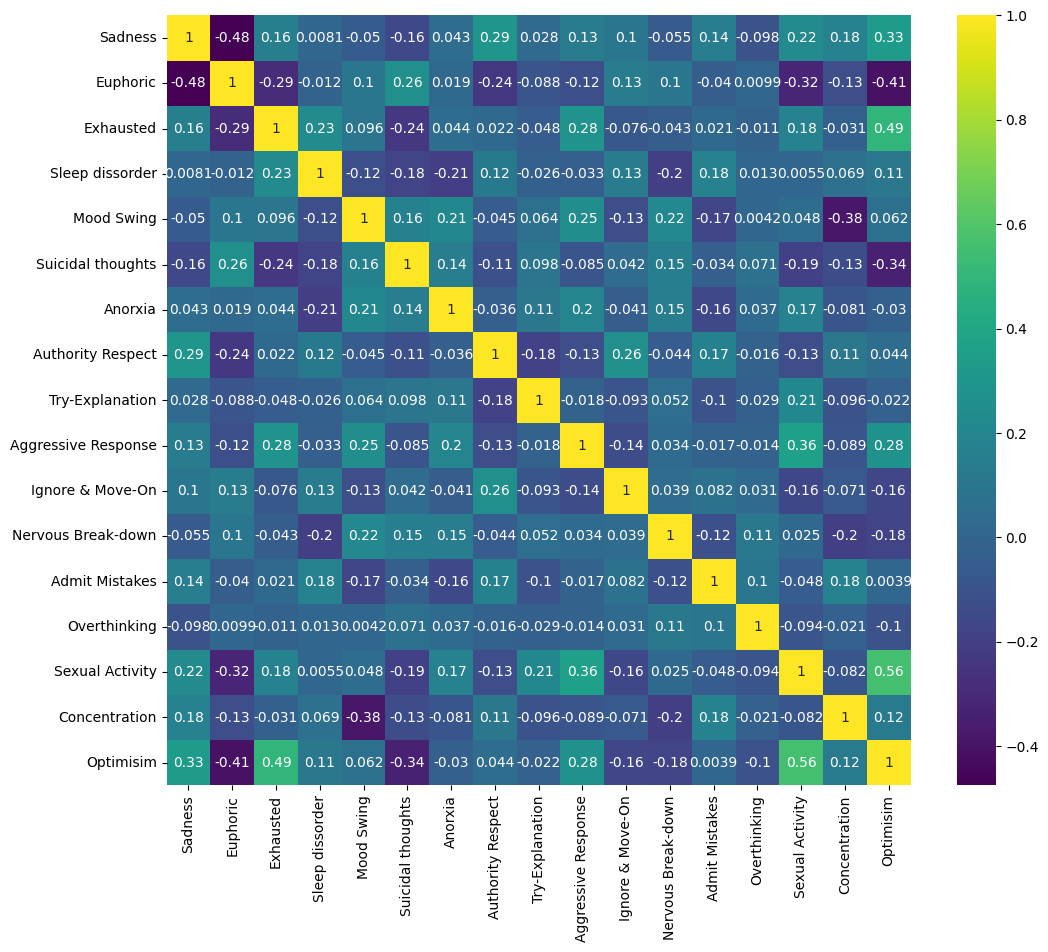

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, cmap='viridis')